<a href="https://colab.research.google.com/github/theTURYA/deep-learning/blob/main/Customer_Segmentation_using_K_means_Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Work Flow:
Customer Data --> Data Pre-processing --> Data Analysis --> Optimum number of Clusters (WCSS) --> K-Means Clustering --> Visualizating the Clusters


🥊**Dataset link:** https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?resource=download

### Importing the required dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


### Data Collection and Analysis

In [5]:
# Load the dataset fro csv file to Pandas DataFrame
customer_data = pd.read_csv("/content/Mall_Customers.csv")
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# Finding the rows and columns
customer_data.shape, customer_data.size

((200, 5), 1000)

In [8]:
# Getting some more information about our dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [25]:
# Check the missing values
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


🔑 **Note:**  In yhis case we don't have any missing values. But in case if you have any missing values you can use **Imputation** method to rephrase those missing values with suitable values.

### Choosing the `Annual Income` column and `Spending Score` column

In [31]:
X = customer_data.iloc[:,[3,4]].values
X, X.shape, X.size

(array([[ 15,  39],
        [ 15,  81],
        [ 16,   6],
        [ 16,  77],
        [ 17,  40],
        [ 17,  76],
        [ 18,   6],
        [ 18,  94],
        [ 19,   3],
        [ 19,  72],
        [ 19,  14],
        [ 19,  99],
        [ 20,  15],
        [ 20,  77],
        [ 20,  13],
        [ 20,  79],
        [ 21,  35],
        [ 21,  66],
        [ 23,  29],
        [ 23,  98],
        [ 24,  35],
        [ 24,  73],
        [ 25,   5],
        [ 25,  73],
        [ 28,  14],
        [ 28,  82],
        [ 28,  32],
        [ 28,  61],
        [ 29,  31],
        [ 29,  87],
        [ 30,   4],
        [ 30,  73],
        [ 33,   4],
        [ 33,  92],
        [ 33,  14],
        [ 33,  81],
        [ 34,  17],
        [ 34,  73],
        [ 37,  26],
        [ 37,  75],
        [ 38,  35],
        [ 38,  92],
        [ 39,  36],
        [ 39,  61],
        [ 39,  28],
        [ 39,  65],
        [ 40,  55],
        [ 40,  47],
        [ 40,  42],
        [ 40,  42],


Choosing the number of clusters:
 * WCSS --> Within Clusters Sum of Squares

📖 **Resources:** https://www.ibm.com/topics/k-means-clustering


In [27]:
# Finding WCSS value for different number of clusters

wcss = []
for i in range (1,11):
  k_means = KMeans(n_clusters=i,init='k-means++', random_state=42)
  k_means.fit(X)

  wcss.append(k_means.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

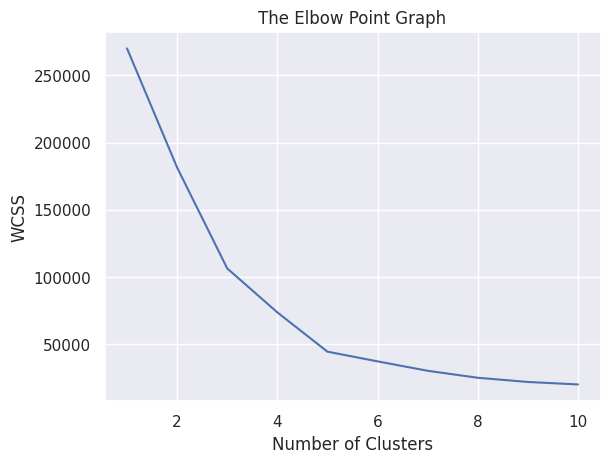

In [28]:
# Plot an elbow graph
sns.set()
plt.plot(range(1,11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In this case, the optimum number of cluters is 5

Training the K-Means Clustering Model

In [32]:
k_means = KMeans(n_clusters= 5, init ='k-means++', random_state = 0)

# Return a label for each datapoint based on their Cluster
Y = k_means.fit_predict(X)
Y


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

5 Clusters : 0, 1, 2, 3, 4

Visualizing all the Clusters

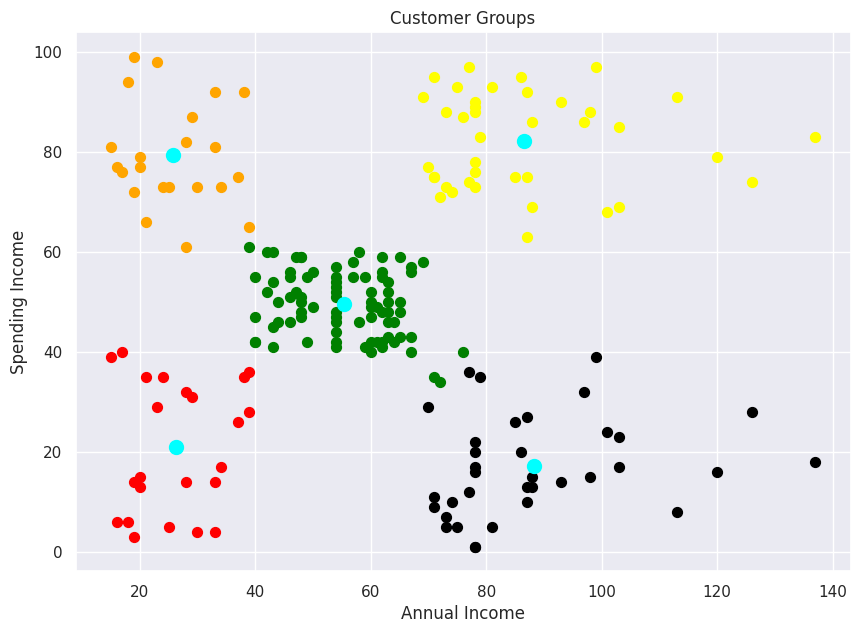

In [37]:
# Plotting all the Clusters and their Centroids
plt.figure(figsize=(10,7))
plt.scatter(X[Y==0,0], X[Y==0,1], s = 50, c = 'green', label = "Cluster_1")
plt.scatter(X[Y==1,0], X[Y==1,1], s = 50, c = 'yellow', label = "Cluster_2")
plt.scatter(X[Y==2,0], X[Y==2,1], s = 50, c = 'black', label = "Cluster_3")
plt.scatter(X[Y==3,0], X[Y==3,1], s = 50, c = 'red', label = "Cluster_4")
plt.scatter(X[Y==4,0], X[Y==4,1], s = 50, c = 'orange', label = "Cluster_5")

# Plot the Centroids
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1],
            s = 100, c = 'cyan', label = 'Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Income')
plt.show()
